<a href="https://colab.research.google.com/github/amandaventurac/DataScience_Python_R_Brazilian_Health_System/blob/master/income_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to predict **when the personal income is higher than 50K/year in the US**, based on predictors as age, sex, professional activity, native country, and other demographic characteristics. 

The dataset is available at  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/


Accordingo to adults.names (metadata file), the predictor variables are:

    age: continuous.

    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

    **fnlwgt**: continuous. (see about this variable below)

    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

    education-num: continuous.

    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

    sex: Female, Male.

    capital-gain: continuous.

    capital-loss: continuous.

    hours-per-week: continuous.

    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

All variables are understandable at first, except fnlwgt (final weight). 

Thera are more details on metadata files, that could be summarized as:

    The fnlwgt column is numerical continuous
    This column was a product of other demographic characteristics, as:
        Hispanic origin information
        Race, sex, and age
    An algorithm was constructed to adjust the weights based on the above information.
    As result, people with similar demographic characteristics should have similar weights.


At this point, the problem is understood and the dataset can be imported. 
The metadata information was used to construct a dataset head, to simplify the pandas load process. 

**Looking at the train dataset:**

Please go to https://github.com/amandaventurac/Income_predictor/blob/main/adult_with_head_train.csv

Please click on "View raw", and copy the link to the 'url_train' variable below.
This procedure is necessary due to private repository and constant token update. 

After some minutes, if you need to run again the code below, you will have to access the link and paste the new address with a new token.   

The train dataset has 32561 rows and 15 columns


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capita-gain,capital-loss,hours-per-week,native-country,income
6550,29,Private,110442,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,45,United-States,<=50K
6936,25,Private,34402,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,1590,60,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
25338,56,Private,147202,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,45,Germany,<=50K
29275,36,Private,201117,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
6611,66,Local-gov,75134,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
17452,47,Self-emp-inc,119471,7th-8th,4,Never-married,Craft-repair,Not-in-family,Other,Male,0,0,40,?,<=50K
23402,23,Private,65481,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
6286,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5626,43,Private,198203,Some-college,10,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K


As we can see below, there is not missing data pointed by missingno module, but there are unknown values as '?'. 


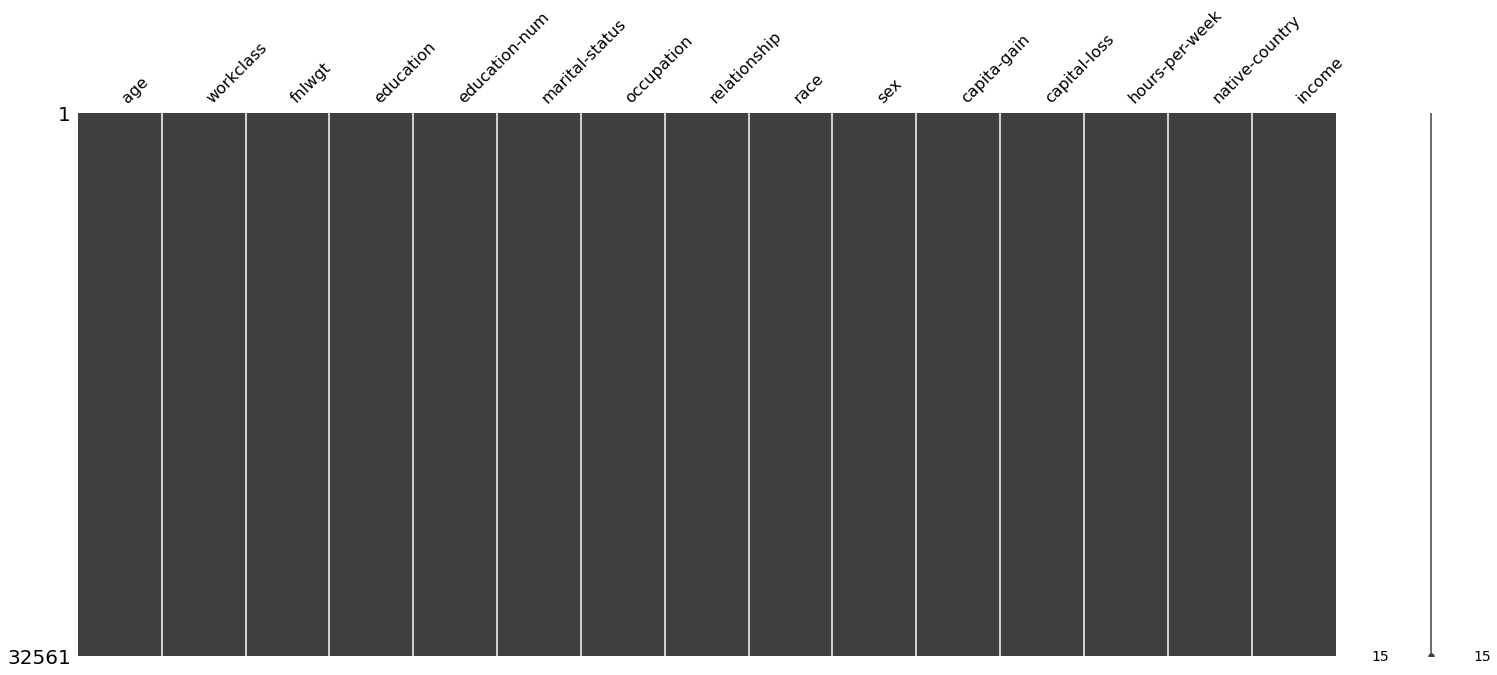

In [ ]:
import io
import requests
import pandas as pd
import missingno as msgno

url_train = "https://raw.githubusercontent.com/amandaventurac/Income_predictor/main/adult_with_head_train.csv?token=AJ47KBW53VMBV56OXWKWLDLAAXSHI"
s = requests.get(url_train).content
train = pd.read_csv(io.BytesIO(s))
print("The train dataset has {} rows and {} columns".format(train.shape[0], train.shape[1]))

display(train.sample(10))

print("As we can see below, there is not missing data pointed by missingno module, but there are unknown values as '?'. ")
msgno.matrix(train)



In [ ]:
display(type(train))
display(train.dtypes.value_counts)
display(train.describe())

pandas.core.frame.DataFrame

<bound method IndexOpsMixin.value_counts of age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capita-gain        int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object>

,age,fnlwgt,education-num,capita-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Looking at the test dataset:**

Please go to https://github.com/amandaventurac/Income_predictor/blob/main/adult_with_head_test.csv

Please click on "View raw", and copy the link to the 'url_test' variable below.
This procedure is necessary due to private repository and constant token update. 

After some minutes, if you need to run again the code below, you will have to access the link and paste the new address with a new token.   

The test dataset has 16281 rows and 15 columns


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capita-gain,capital-loss,hours-per-week,native-country,income
16160,26,Private,143280,HS-grad,9,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K.
12590,40,Private,33795,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
15557,26,?,408417,Some-college,10,Married-AF-spouse,?,Husband,Black,Male,0,0,38,United-States,<=50K.
3998,37,Private,112838,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K.
11125,29,State-gov,51461,Assoc-acdm,12,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States,<=50K.
6516,43,Federal-gov,53956,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,55,United-States,>50K.
6873,36,Private,195148,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K.
6301,29,Local-gov,95471,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K.
12218,22,Private,172496,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Poland,<=50K.
4729,50,Private,176773,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,Haiti,<=50K.


As we can see below, there is not missing data pointed by missingno module, but there are unknown values as '?'. 


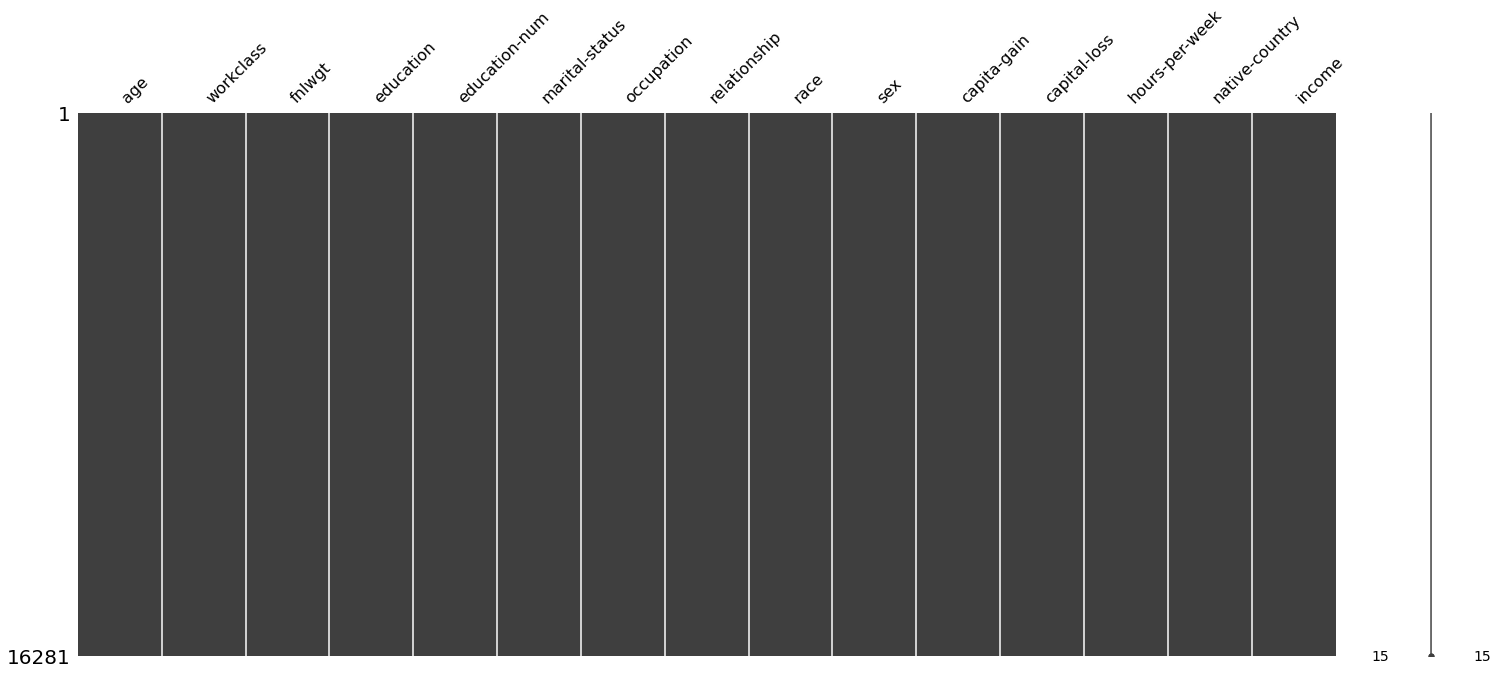

In [ ]:
url_test = "https://raw.githubusercontent.com/amandaventurac/Income_predictor/main/adult_with_head_test.csv?token=AJ47KBQIVHIAXRJAN3WDWZDAAXTAQ"
s2 = requests.get(url_test).content
test = pd.read_csv(io.BytesIO(s2))
print("The test dataset has {} rows and {} columns".format(test.shape[0], test.shape[1]))

display(test.sample(10))

print("As we can see below, there is not missing data pointed by missingno module, but there are unknown values as '?'. ")
msgno.matrix(test)

In [ ]:
display(type(test))
display(test.dtypes.value_counts)
display(test.describe())

pandas.core.frame.DataFrame

<bound method IndexOpsMixin.value_counts of age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capita-gain        int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object>

,age,fnlwgt,education-num,capita-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


The numerical columns are correctly set as numerical type on both datasets. The other columns are strings, categorical variables. 

The metadata.names file (https://github.com/amandaventurac/Income_predictor/blob/main/metadata.names) describes the process used to analyze such data.

The authors removed the unknown data from the dataset, instead of performing any imputation task. With this procedure, they achieved 85.90%+-0.28% accuracy with Naive Bayes Tree, which is a reasonable value. 

Therefore, this project will begin with the same approach by removing the unknown data. If a reasonable accuracy (> 80%) is achieved, then a future step could comprise the imputation methods and its analyses on the performance metrics impact.  

To remove the unknown data, it's useful to group the categorical variables:

In [ ]:
group_train_workclass = train["workclass"].value_counts()
print(group_train_workclass)
unique_workclass_values = set(list((group_train_workclass.index)))
print(unique_workclass_values)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
{' ?', ' Federal-gov', ' Without-pay', ' Self-emp-not-inc', ' Private', ' State-gov', ' Local-gov', ' Self-emp-inc', ' Never-worked'}


The only unknow workclass category is defined as ' ?'. Before going on, it is useful to remove the blank spaces and to lower all characters. The apply command can be used.

In [ ]:
def remove_space_and_lower_case(data):
  try:
    out = data.strip()
    out = out.lower()
  except:
    out = data
  return out

In [ ]:
for element in ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]:
  treated_column_name = element+"_treated"
  train[treated_column_name] = train[element].apply(remove_space_and_lower_case)

print(train.columns)
train.sample(10)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capita-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'workclass_treated', 'education_treated',
       'marital-status_treated', 'occupation_treated', 'relationship_treated',
       'race_treated', 'sex_treated', 'native-country_treated'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capita-gain,capital-loss,hours-per-week,native-country,income,workclass_treated,education_treated,marital-status_treated,occupation_treated,relationship_treated,race_treated,sex_treated,native-country_treated
8142,38,Local-gov,82880,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,15,United-States,<=50K,local-gov,bachelors,married-civ-spouse,prof-specialty,wife,white,female,united-states
14401,37,Self-emp-not-inc,352882,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Asian-Pac-Islander,Female,0,0,70,South,>50K,self-emp-not-inc,hs-grad,divorced,exec-managerial,not-in-family,asian-pac-islander,female,south
12950,26,Private,380674,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,52,United-States,<=50K,private,hs-grad,never-married,handlers-cleaners,own-child,white,male,united-states
23228,49,?,171411,9th,5,Divorced,?,Not-in-family,White,Male,0,0,40,United-States,<=50K,?,9th,divorced,?,not-in-family,white,male,united-states
16910,29,Self-emp-inc,241431,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,>50K,self-emp-inc,doctorate,married-civ-spouse,prof-specialty,husband,white,male,united-states
20681,55,Private,252714,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,private,assoc-voc,married-civ-spouse,adm-clerical,husband,white,male,united-states
2914,24,Private,228613,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K,private,11th,never-married,machine-op-inspct,unmarried,white,female,united-states
24815,50,Private,23686,Some-college,10,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,0,35,United-States,>50K,private,some-college,married-civ-spouse,adm-clerical,other-relative,white,female,united-states
17403,45,Private,97176,11th,7,Divorced,Adm-clerical,Unmarried,White,Female,0,0,16,United-States,<=50K,private,11th,divorced,adm-clerical,unmarried,white,female,united-states
24628,56,Self-emp-not-inc,176280,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,0,0,50,United-States,<=50K,self-emp-not-inc,hs-grad,divorced,other-service,not-in-family,white,male,united-states


It's time to check if the unique values set on **workclass_treated** contains "?" instead of " ?":

In [ ]:
group_train_workclass_treated = train["workclass_treated"].value_counts()
print(group_train_workclass_treated)
unique_workclass_values_treated = set(list((group_train_workclass_treated.index)))
print(unique_workclass_values_treated)

private             22696
self-emp-not-inc     2541
local-gov            2093
?                    1836
state-gov            1298
self-emp-inc         1116
federal-gov           960
without-pay            14
never-worked            7
Name: workclass_treated, dtype: int64
{'state-gov', 'federal-gov', 'never-worked', 'private', 'without-pay', 'self-emp-inc', 'self-emp-not-inc', '?', 'local-gov'}


The " ?" was successfully replaced by "?". The unknown values will be removed:

In [ ]:
remove_list = ["?"]
train = train[~train["workclass_treated"].isin(remove_list)]
print(train)

       age          workclass  ...  sex_treated native-country_treated
0       39          State-gov  ...         male          united-states
1       50   Self-emp-not-inc  ...         male          united-states
2       38            Private  ...         male          united-states
3       53            Private  ...         male          united-states
4       28            Private  ...       female                   cuba
...    ...                ...  ...          ...                    ...
32556   27            Private  ...       female          united-states
32557   40            Private  ...         male          united-states
32558   58            Private  ...       female          united-states
32559   22            Private  ...         male          united-states
32560   52       Self-emp-inc  ...       female          united-states

[30725 rows x 23 columns]


Following the same procedure with **education column**:


In [ ]:
group_train_education = train["education_treated"].value_counts()
print(group_train_education)
unique_education_values = set(list((group_train_education.index)))
print(unique_education_values)

hs-grad         9969
some-college    6777
bachelors       5182
masters         1675
assoc-voc       1321
11th            1057
assoc-acdm      1020
10th             833
7th-8th          574
prof-school      558
9th              463
doctorate        398
12th             393
5th-6th          303
1st-4th          156
preschool         46
Name: education_treated, dtype: int64
{'bachelors', '11th', '9th', '5th-6th', '1st-4th', 'hs-grad', '7th-8th', 'assoc-voc', 'assoc-acdm', '10th', 'preschool', 'doctorate', 'some-college', '12th', 'prof-school', 'masters'}


There is not unknown category on this column. Following with  **marital-status**


In [ ]:
group_train_marital_status = train["marital-status_treated"].value_counts()
print(group_train_marital_status)
unique_marital_status_values = set(list((group_train_marital_status.index)))
print(unique_marital_status_values)

married-civ-spouse       14340
never-married             9917
divorced                  4259
separated                  959
widowed                    840
married-spouse-absent      389
married-af-spouse           21
Name: marital-status_treated, dtype: int64
{'married-civ-spouse', 'separated', 'widowed', 'married-spouse-absent', 'married-af-spouse', 'divorced', 'never-married'}


There is not unknown values on this column. **Occupation** column:

In [ ]:
group_train_occupation = train["occupation_treated"].value_counts()
print(group_train_occupation)
unique_occupation_values = set(list((group_train_occupation.index)))
print(unique_occupation_values)

prof-specialty       4140
craft-repair         4099
exec-managerial      4066
adm-clerical         3770
sales                3650
other-service        3295
machine-op-inspct    2002
transport-moving     1597
handlers-cleaners    1370
farming-fishing       994
tech-support          928
protective-serv       649
priv-house-serv       149
armed-forces            9
?                       7
Name: occupation_treated, dtype: int64
{'adm-clerical', 'farming-fishing', 'priv-house-serv', 'craft-repair', 'prof-specialty', 'transport-moving', 'tech-support', 'exec-managerial', 'sales', 'handlers-cleaners', 'machine-op-inspct', 'protective-serv', 'armed-forces', 'other-service', '?'}


The occupation column also presents "?" category. The unknown rows will be removed.

In [ ]:
train = train[~train["occupation_treated"].isin(remove_list)]
print(train)

       age          workclass  ...  sex_treated native-country_treated
0       39          State-gov  ...         male          united-states
1       50   Self-emp-not-inc  ...         male          united-states
2       38            Private  ...         male          united-states
3       53            Private  ...         male          united-states
4       28            Private  ...       female                   cuba
...    ...                ...  ...          ...                    ...
32556   27            Private  ...       female          united-states
32557   40            Private  ...         male          united-states
32558   58            Private  ...       female          united-states
32559   22            Private  ...         male          united-states
32560   52       Self-emp-inc  ...       female          united-states

[30718 rows x 23 columns]


Now, the **Relationship** column:

In [ ]:
group_train_relationship = train["relationship_treated"].value_counts()
print(group_train_relationship)
unique_relationship_values = set(list((group_train_relationship.index)))
print(unique_relationship_values)

husband           12704
not-in-family      7865
own-child          4525
unmarried          3271
wife               1435
other-relative      918
Name: relationship_treated, dtype: int64
{'wife', 'husband', 'unmarried', 'own-child', 'not-in-family', 'other-relative'}


There is no unknown category. **The number of 'wife' reported status is approximately ten times less than the occurrence of husband status**. What is the most reported female relationship status? 

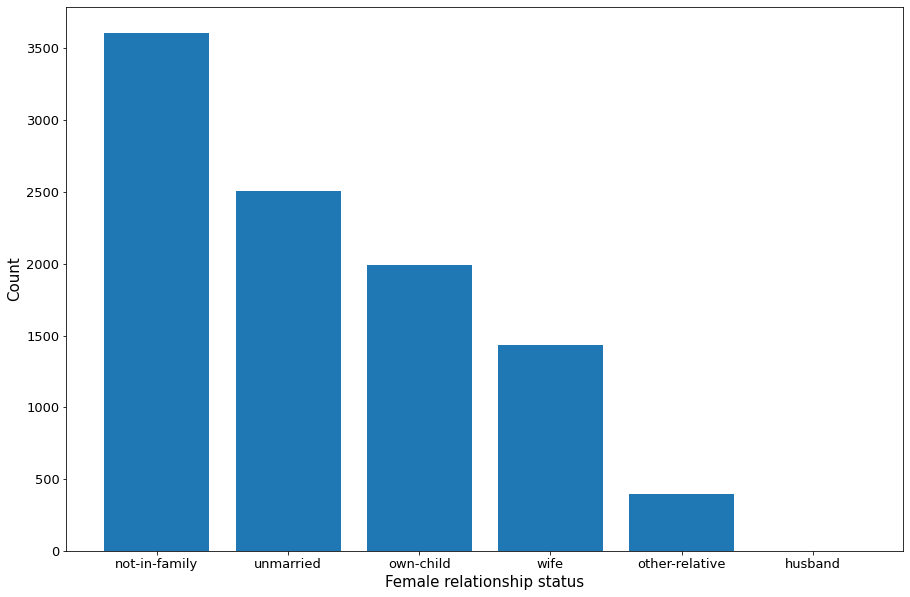

not-in-family     3607
unmarried         2506
own-child         1989
wife              1433
other-relative     394
husband              1
Name: relationship_treated, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
female_train = train[train["sex_treated"] == 'female']
female_grouped_by_relationship_train = female_train["relationship_treated"].value_counts()
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.bar(female_grouped_by_relationship_train.index, height =female_grouped_by_relationship_train.values )
plt.xlabel("Female relationship status", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()
print(female_grouped_by_relationship_train)

The most reported female relationship status was 'not-in-family'. There is only one occurrence of 'husband' relationship status for women. Therefore, a woman reporting 'husband' relationship status is a rare event. This category could be joined with 'other-relative' to construct a new category called 'others'. This question will be investigated ahead on correlation matrix step. Additionaly,other plots will be done with final count after removing all unknown values. There preliminary plot are just to better know the dataset.

And for men: 


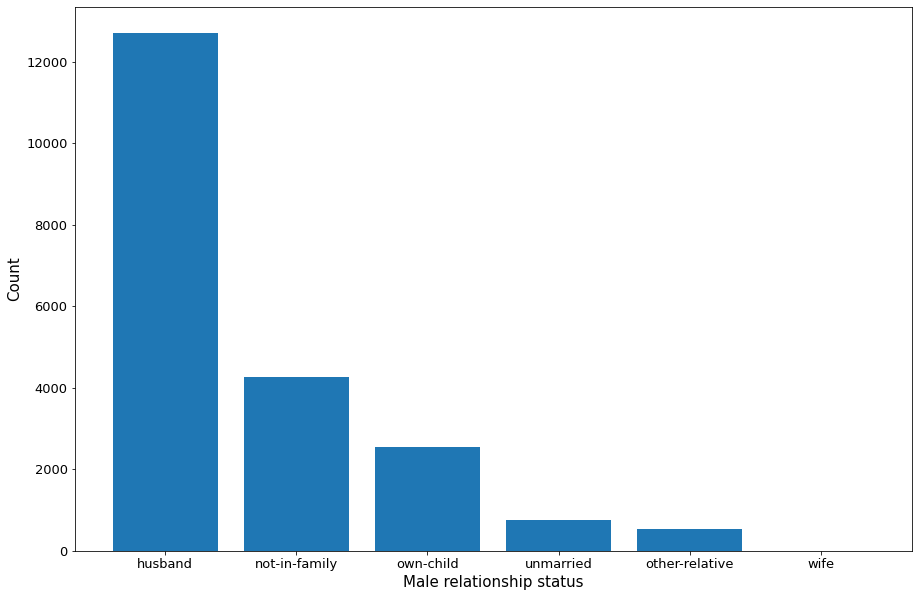

husband           12703
not-in-family      4258
own-child          2536
unmarried           765
other-relative      524
wife                  2
Name: relationship_treated, dtype: int64


In [ ]:
male_train = train[train["sex_treated"] == 'male']
male_grouped_by_relationship_train = male_train["relationship_treated"].value_counts()
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.bar(male_grouped_by_relationship_train.index, height =male_grouped_by_relationship_train.values )
plt.xlabel("Male relationship status", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()
print(male_grouped_by_relationship_train)

The most reported male relationship status was 'husband'. Again the same observed pattern for women, only two men reported 'wife' relationship status, this is a rare class that could be joined with other-relative when sex = male. This will be considered ahead. At this moment, there is nothing to be removed due to 'relationship' status. Following with **'race' column**:

In [ ]:
group_train_race = train["race_treated"].value_counts()
print(group_train_race)
unique_race_values = set(list((group_train_race.index)))
print(unique_race_values)

white                 26301
black                  2909
asian-pac-islander      974
amer-indian-eskimo      286
other                   248
Name: race_treated, dtype: int64
{'black', 'other', 'white', 'amer-indian-eskimo', 'asian-pac-islander'}


There is not unknown values on this columns. The less reported class, 'other' has a small percentage of data:

In [ ]:
import numpy as np
print("The 'other' reported race appeared on {}% or rows".format(np.round(group_train_race.values[-1]*100/train.shape[0],2)))

The 'other' reported race appeared on 0.81% or rows


The next column is **'sex'**:

In [ ]:
group_train_sex = train["sex_treated"].value_counts()
print(group_train_sex)
unique_sex_values = set(list((group_train_sex.index)))
print(unique_sex_values)

male      20788
female     9930
Name: sex_treated, dtype: int64
{'female', 'male'}


There is not unknown category on 'sex' column. The next categorical column is **'native_country'**:

In [ ]:
group_train_country = train["native-country_treated"].value_counts()
print(group_train_country)
unique_country_values = set(list((group_train_country.index)))
print(unique_country_values)

united-states                 27504
mexico                          610
?                               556
philippines                     188
germany                         128
puerto-rico                     109
canada                          107
el-salvador                     100
india                           100
cuba                             92
england                          86
jamaica                          80
south                            71
china                            68
italy                            68
dominican-republic               67
vietnam                          64
guatemala                        63
japan                            59
columbia                         56
poland                           56
taiwan                           42
haiti                            42
iran                             42
portugal                         34
nicaragua                        33
peru                             30
greece                      

Removing the '?' data:

In [ ]:
train = train[~train["native-country_treated"].isin(remove_list)]
print("After removing all unknow data, the number of rown on train dataset is {}.".format(train.shape[0]))

After removing all unknow data, the number of rown on train dataset is 30162.


This is precisely the number of train dataset rows reported by authors after removing the unknown data. This information can be checked on https://github.com/amandaventurac/Income_predictor/blob/main/metadata.names, line 9.
This validates the performed cleaning proccess. Now the old categorical columns before treatment can be dropped:



In [ ]:
train.drop(labels = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"], axis = 1, inplace = True)
train.head()

,age,fnlwgt,education-num,capita-gain,capital-loss,hours-per-week,income,workclass_treated,education_treated,marital-status_treated,occupation_treated,relationship_treated,race_treated,sex_treated,native-country_treated
0,39,77516,13,2174,0,40,<=50K,state-gov,bachelors,never-married,adm-clerical,not-in-family,white,male,united-states
1,50,83311,13,0,0,13,<=50K,self-emp-not-inc,bachelors,married-civ-spouse,exec-managerial,husband,white,male,united-states
2,38,215646,9,0,0,40,<=50K,private,hs-grad,divorced,handlers-cleaners,not-in-family,white,male,united-states
3,53,234721,7,0,0,40,<=50K,private,11th,married-civ-spouse,handlers-cleaners,husband,black,male,united-states
4,28,338409,13,0,0,40,<=50K,private,bachelors,married-civ-spouse,prof-specialty,wife,black,female,cuba


It is neccessary to do the same cleaning process on test dataset.
To be more efficient, it is useful to copy all the relevant code above, replace "train" by "test", and paste it here. 

In [ ]:
for element in ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]:
  treated_column_name = element+"_treated"
  test[treated_column_name] = test[element].apply(remove_space_and_lower_case)

group_test_workclass_treated = test["workclass_treated"].value_counts()
unique_workclass_values_treated = set(list((group_test_workclass_treated.index)))
remove_list = ["?"]
test = test[~test["workclass_treated"].isin(remove_list)]
group_test_education = test["education_treated"].value_counts()
unique_education_values = set(list((group_test_education.index)))
group_test_marital_status = test["marital-status_treated"].value_counts()
unique_marital_status_values = set(list((group_test_marital_status.index)))
group_test_occupation = test["occupation_treated"].value_counts()
unique_occupation_values = set(list((group_test_occupation.index)))
test = test[~test["occupation_treated"].isin(remove_list)]
group_test_relationship = test["relationship_treated"].value_counts()
unique_relationship_values = set(list((group_test_relationship.index)))
group_test_race = test["race_treated"].value_counts()
unique_race_values = set(list((group_test_race.index)))
group_test_sex = test["sex_treated"].value_counts()
unique_sex_values = set(list((group_test_sex.index)))
group_test_country = test["native-country_treated"].value_counts()
unique_country_values = set(list((group_test_country.index)))
test = test[~test["native-country_treated"].isin(remove_list)]
test.drop(labels = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"], axis = 1, inplace = True)
display(test.head())
print("After removing all unknow data, the number of rown on test dataset is {}.".format(test.shape[0]))


,age,fnlwgt,education-num,capita-gain,capital-loss,hours-per-week,income,workclass_treated,education_treated,marital-status_treated,occupation_treated,relationship_treated,race_treated,sex_treated,native-country_treated
0,25,226802,7,0,0,40,<=50K.,private,11th,never-married,machine-op-inspct,own-child,black,male,united-states
1,38,89814,9,0,0,50,<=50K.,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,united-states
2,28,336951,12,0,0,40,>50K.,local-gov,assoc-acdm,married-civ-spouse,protective-serv,husband,white,male,united-states
3,44,160323,10,7688,0,40,>50K.,private,some-college,married-civ-spouse,machine-op-inspct,husband,black,male,united-states
5,34,198693,6,0,0,30,<=50K.,private,10th,never-married,other-service,not-in-family,white,male,united-states


After removing all unknow data, the number of rown on test dataset is 15060.


Again, this number of rows is precisely the number reported by authors on test set after unknown values remotion.
The next step is to replot the EDA, now with cleaned data. The sweetviz permits an interactive visualization. The page was generated here and can be accessed on: 

In [ ]:
!pip install sweetviz
import sweetviz as sv

train_report = sv.analyze(train)

train_report.show_html('train_report_after_first_cleaning.html')



                                             |          | [  0%]   00:00 -> (? left)

Report train_report_after_first_cleaning.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


To see the generated html page, there are two ways:

**Method 1** (with Download, totally interactive page)

  1. Go to: https://github.com/amandaventurac/Income_predictor/blob/main/train_report_after_first_cleaning.html

  2. Download the file.

  3. Visualize the downloaded file with any browser.

**Method 2** (wihtout Download, non interactive page)

 1. Go to: https://github.com/amandaventurac/Income_predictor/blob/main/train_report_after_first_cleaning.html

 2. Click on 'View raw', and copy the raw link

 3. Run the code cell below.

 4. Paste the raw link (with the token) in the indicated field and press enter.

 5. Click on the printed link.

 * Please note that the token is valid within some minutes. If the HTML needs to be opened again, this process should be done again.



In [7]:
display_html_system = 'https://htmlpreview.github.io/?'
raw_page_link = input("Please paste here the raw link and press Enter")
complete_train_eda_link = display_html_system + raw_page_link
print(complete_train_eda_link)

Please paste here the raw link and press Enterhttps://raw.githubusercontent.com/amandaventurac/Income_predictor/main/train_report_after_first_cleaning.html?token=AJ47KBXGARMMALIQJC2QH23AA3WSG
https://htmlpreview.github.io/?https://raw.githubusercontent.com/amandaventurac/Income_predictor/main/train_report_after_first_cleaning.html?token=AJ47KBXGARMMALIQJC2QH23AA3WSG


The association (or correlation matrix) generated with sweetviz is posted here, if method 2 was chosen:
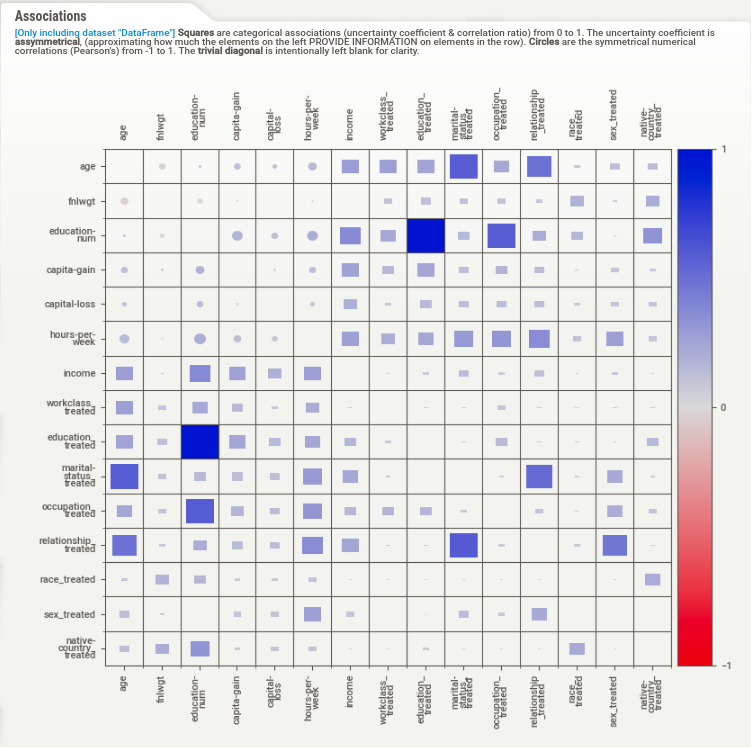

The trivial diagonal is left blank. The education-num, age, capita-gain, capital-loss, hours-per-week, education_treated, marital-status_treated,occupation_treated, relationship_treated and sex_treated columns impact more the income.

Sweetviz also provides numerical information on this impact, for both categorical and numerical columns. The table is posted below. If the visualization method 1 was chosen, this information can be displayed on side bar when the income chart is clicked.